**Name : Aishwarya Bhavsar**<br>
**ID : 029371509**<br>
**CECS 457 - Applied Machine Learning<br>
Big Data Regression**

# **EXPLORATORY DATA ANALYSIS**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('/content/Data.csv')

In [9]:
df = pd.DataFrame(dataset)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


<b> 
1. This dataset consists of 5 numerical variables (float64). <br>
2. There are no missing values (9568 non-null) across all the variables and the data type (dtypes) is a float point number. 
3. This is a clean dataset.

In [11]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**To determine the feature to predict the output, we need to select features that have a strong correlation with the target (PE).**

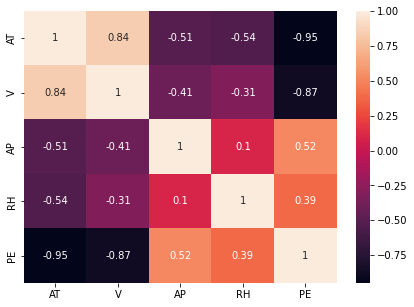

In [ ]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

<b> 
1. AT and V have a strong negative correlation with the target variable (PE) as their correlation coefficients are -0.95 and -0.87 respectively.<br>
2. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.52 and 0.39.

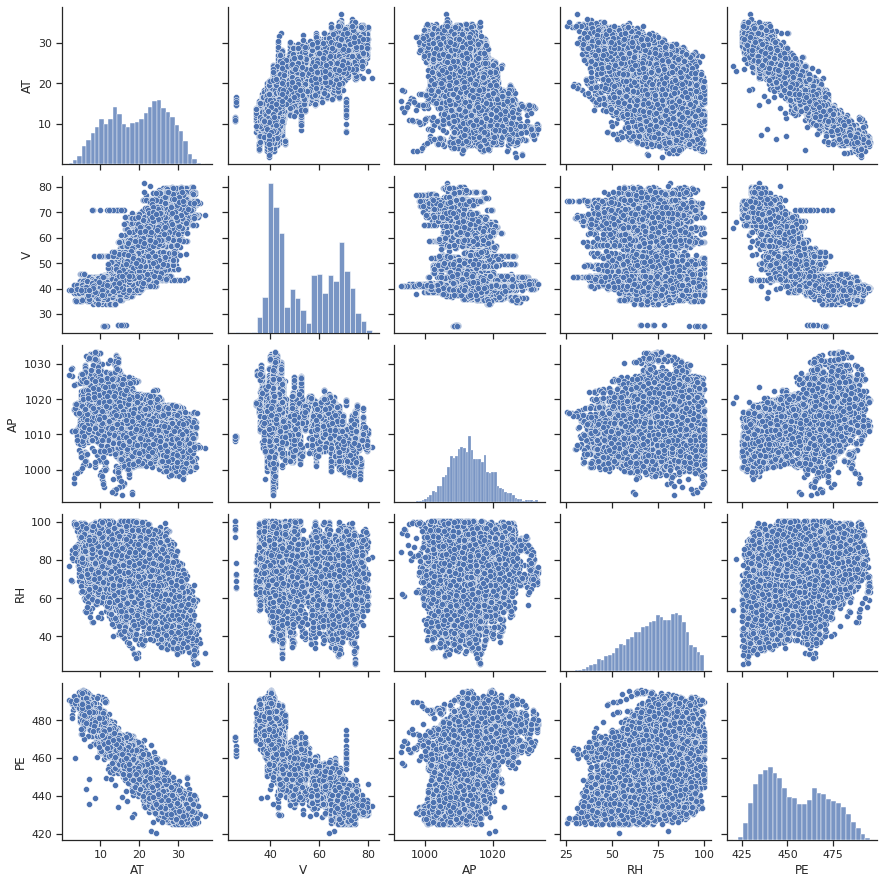

In [ ]:
sns.set(style='ticks')
sns.pairplot(df, diag_kind = 'hist')

# **FEATURE SELECTION**

**Model 1: We select only AT as the predictor (Since it has the strongest correlation with the target variable (PE))**

In [74]:
df_1 = df['AT'].values.reshape(-1,1)

In [75]:
print(df_1)

[[14.96]
 [25.18]
 [ 5.11]
 ...
 [31.32]
 [24.48]
 [21.6 ]]


**Model 2: We select AT and V as the predictors**

In [82]:
df_2 = df[['AT', 'V']]

In [13]:
print(df_2)

         AT      V
0     14.96  41.76
1     25.18  62.96
2      5.11  39.40
3     20.86  57.32
4     10.82  37.50
...     ...    ...
9563  16.65  49.69
9564  13.19  39.18
9565  31.32  74.33
9566  24.48  69.45
9567  21.60  62.52

[9568 rows x 2 columns]


**Model 3: We select AT, V and RH as the predictors**

In [198]:
df_3 = df[['AT', 'V', 'RH']]

In [199]:
print(df_3)

         AT      V     RH
0     14.96  41.76  73.17
1     25.18  62.96  59.08
2      5.11  39.40  92.14
3     20.86  57.32  76.64
4     10.82  37.50  96.62
...     ...    ...    ...
9563  16.65  49.69  91.00
9564  13.19  39.18  66.78
9565  31.32  74.33  36.48
9566  24.48  69.45  62.39
9567  21.60  62.52  67.87

[9568 rows x 3 columns]


**Model 4: We select AT, V, AP, and RH as the predictors**

In [221]:
df_4 = df[['AT', 'V', 'AP', 'RH']]

In [222]:
print(df_4)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


<B>Our target variable (PE) is y

In [72]:
y = df['PE']

In [17]:
print(y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


# **TRAINING THE MODEL**

## <font color='red'>**1. SIMPLE LINEAR REGRESSION**

# <font color='blue'><b> MODEL 1

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [99]:
y_pred = regressor.predict(X_test)

In [100]:
print(y_pred)

[434.76410847 459.05380424 464.74602275 ... 470.43824126 437.7622999
 459.48832474]


**Visualising the Training set results**

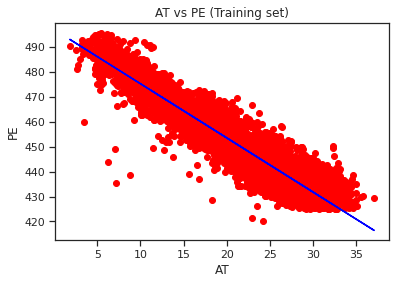

In [61]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT vs PE (Training set)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

**Visualising the Test set results**

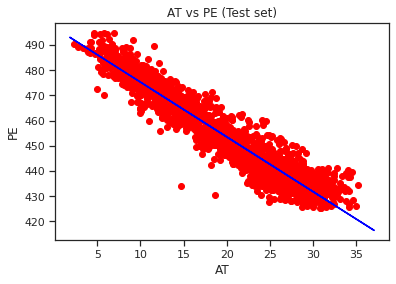

In [62]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT vs PE (Test set)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

**R-squared**

In [102]:
from sklearn.metrics import r2_score
r_squared_lr = r2_score(y_test, y_pred)
r_squared_lr

0.9049536175690113

# <font color='blue'><b> MODEL 2

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [134]:
y_pred = regressor.predict(X_test)

In [135]:
print(y_pred)

[431.3059015  459.66930773 466.17078381 ... 470.03631172 443.50414918
 463.09465765]


**Visualising the Training set results**

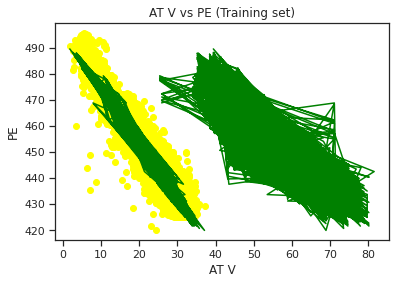

In [141]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('AT V vs PE (Training set)')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

**Visualising the Test set results**

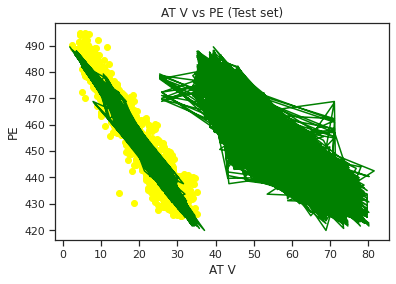

In [142]:
plt.scatter(X_test[X_test.columns[0]], y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('AT V vs PE (Test set)')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

**R squared**

In [143]:
from sklearn.metrics import r2_score
r_squared_lr = r2_score(y_test, y_pred)
r_squared_lr

0.9196215863801613

# <font color='blue'><b> MODEL 3

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [163]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting**

In [164]:
y_pred = regressor.predict(X_test)

In [165]:
print(y_pred)

[431.45085245 458.01218311 462.31593245 ... 468.99545339 442.78588014
 462.28472432]


**Visualisation - Training Set Results**

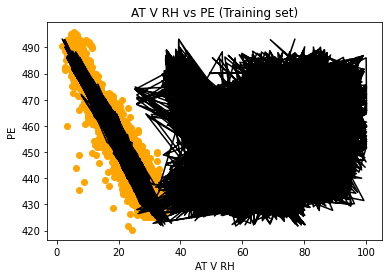

In [169]:
plt.scatter(X_train[X_test.columns[0]], y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('AT V RH vs PE (Training set)')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

**Visualisation - Test Set Results**

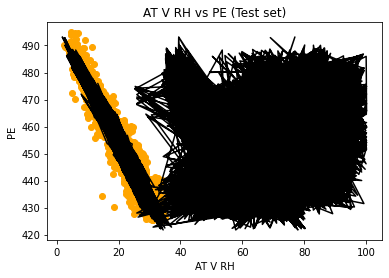

In [171]:
plt.scatter(X_test[X_test.columns[0]], y_test, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('AT V RH vs PE (Test set)')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

**R squared**

In [172]:
from sklearn.metrics import r2_score
r_squared_lr = r2_score(y_test, y_pred)
r_squared_lr

0.9322888939219065

# <font color='blue'><b> MODEL 4

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [184]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting**

In [185]:
y_pred = regressor.predict(X_test)

In [186]:
print(y_pred)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


**Visualisation - Training Set Results**

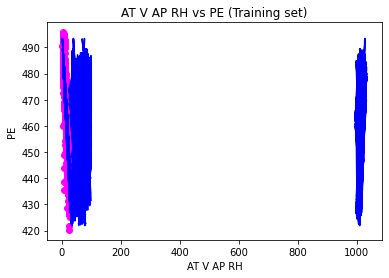

In [187]:
plt.scatter(X_train[X_test.columns[0]], y_train, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT V AP RH vs PE (Training set)')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**Visualisation - Test Set Results**

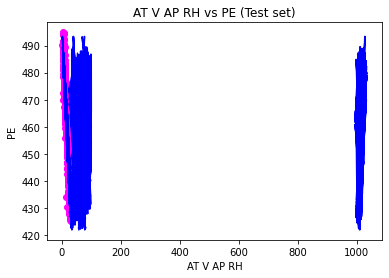

In [190]:
plt.scatter(X_test[X_test.columns[0]], y_test, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT V AP RH vs PE (Test set)')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**R squared**

In [191]:
from sklearn.metrics import r2_score
r_squared_lr = r2_score(y_test, y_pred)
r_squared_lr

0.9325315554761303

## <font color='red'>**2. SUPPORT VECTOR REGRESSION**

# <font color='blue'><b> MODEL 1

In [103]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [104]:
y_pred = regressor.predict(X_test)

In [105]:
print(y_pred)

[435.62005329 458.12318211 464.99656434 ... 471.61898421 437.35589541
 458.66134839]


<b>Visualising the Support Vector Regression results

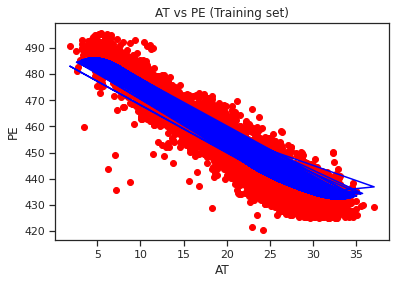

In [66]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT vs PE (Training set)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

**R-squared**

In [106]:
from sklearn.metrics import r2_score
r_squared_svr = r2_score(y_test, y_pred)
r_squared_svr

0.9156480148348056

# <font color='blue'><b> MODEL 2

In [41]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
print(y_pred)

[432.88718756 458.47722485 466.03226592 ... 471.15159507 441.82163596
 461.66816868]


<b>Visualising the Support Vector Regression results

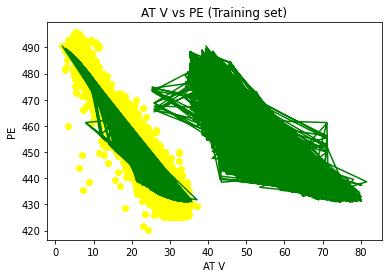

In [44]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('AT V vs PE (Training set)')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

**R-squared**

In [24]:
from sklearn.metrics import r2_score
r_squared_svr = r2_score(y_test, y_pred)
r_squared_svr

0.9326207875019243

# <font color='blue'><b> MODEL 3

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [201]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [202]:
y_pred = regressor.predict(X_test)

In [203]:
print(y_pred)

[434.08090566 458.12894235 463.37366603 ... 470.64221575 442.37071023
 462.16242123]


<b>Visualising the Support Vector Regression results

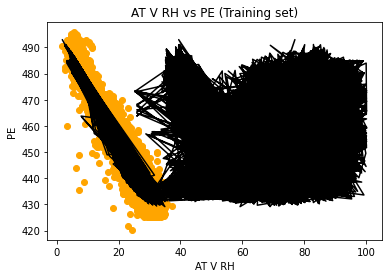

In [204]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('AT V RH vs PE (Training set)')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

**R-squared**

In [205]:
from sklearn.metrics import r2_score
r_squared_svr = r2_score(y_test, y_pred)
r_squared_svr

0.9384610683994934

# <font color='blue'><b> MODEL 4

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [224]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [225]:
y_pred = regressor.predict(X_test)

In [226]:
print(y_pred)

[445.29929921 455.02475403 457.85022498 ... 457.13242754 450.71643694
 455.2789628 ]


<b>Visualising the Support Vector Regression results

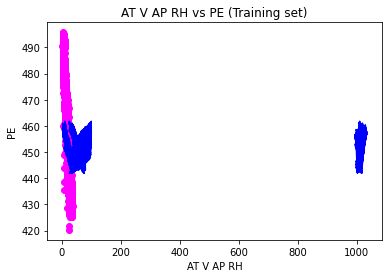

In [227]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('AT V AP RH vs PE (Training set)')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**R-squared**

In [228]:
from sklearn.metrics import r2_score
r_squared_svr = r2_score(y_test, y_pred)
r_squared_svr

0.38182110451293594

## <font color='red'>**3. DECISION TREE REGRESSION**

# <font color='blue'><b> MODEL 1

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred = dt_regressor.predict(X_test)

In [47]:
print(y_pred)

[436.97 454.67 464.22 ... 464.25 450.53 456.2 ]


<b>Visualising the Decision Tree Regression results

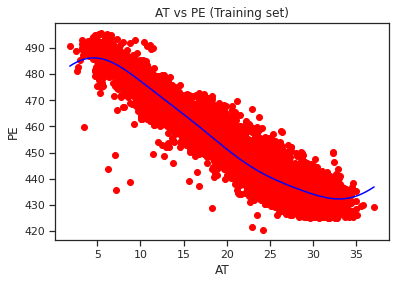

In [71]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('AT vs PE (Training set)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

**R-squared**

In [110]:
from sklearn.metrics import r2_score
r_squared_dt = r2_score(y_test, y_pred)
r_squared_dt

0.8795086758953446

# <font color='blue'><b> MODEL 2

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred = dt_regressor.predict(X_test)

In [50]:
print(y_pred)

[436.12 454.67 464.22 ... 464.25 450.53 456.2 ]


<b>Visualising the Decision Tree Regression results

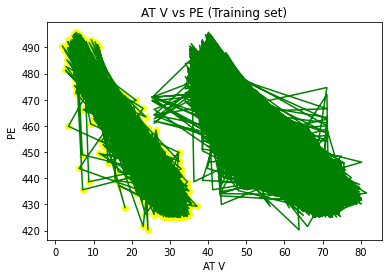

In [51]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'yellow')
plt.plot(X_train, dt_regressor.predict(X_train), color = 'green')
plt.title('AT V vs PE (Training set)')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

**R-squared**

In [53]:
from sklearn.metrics import r2_score
r_squared_dt = r2_score(y_test, y_pred)
r_squared_dt

0.9265828229541542

# <font color='blue'><b> MODEL 3

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [207]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [208]:
y_pred = dt_regressor.predict(X_test)

In [209]:
print(y_pred)

[436.42 455.11 460.19 ... 464.25 437.76 462.55]


<b>Visualising the Decision Tree Regression results

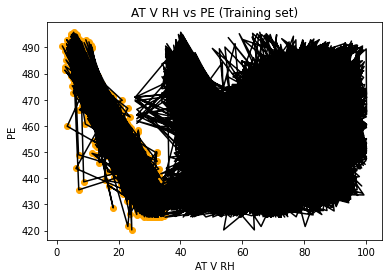

In [210]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'orange')
plt.plot(X_train, dt_regressor.predict(X_train), color = 'black')
plt.title('AT V RH vs PE (Training set)')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

**R-squared**

In [211]:
from sklearn.metrics import r2_score
r_squared_dt = r2_score(y_test, y_pred)
r_squared_dt

0.9285539980415322

# <font color='blue'><b> MODEL 4

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [230]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [231]:
y_pred = dt_regressor.predict(X_test)

In [232]:
print(y_pred)

[429.06 462.81 460.06 ... 471.46 437.76 462.55]


<b>Visualising the Decision Tree Regression results

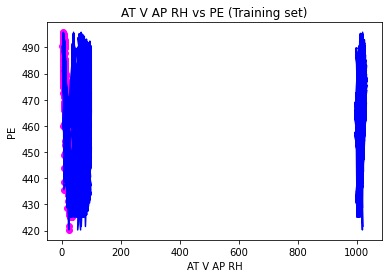

In [234]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'magenta')
plt.plot(X_train, dt_regressor.predict(X_train), color = 'blue')
plt.title('AT V AP RH vs PE (Training set)')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**R-squared**

In [235]:
from sklearn.metrics import r2_score
r_squared_dt = r2_score(y_test, y_pred)
r_squared_dt

0.9216564596258244

## <font color='red'>**4. RANDOM FOREST REGRESSION**

# <font color='blue'><b> MODEL 1

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [78]:
y_pred = rf_regressor.predict(X_test)

In [79]:
print(y_pred)

[434.206      458.04575159 467.77241667 ... 468.24694167 440.98444524
 457.8549    ]


**visualisation**

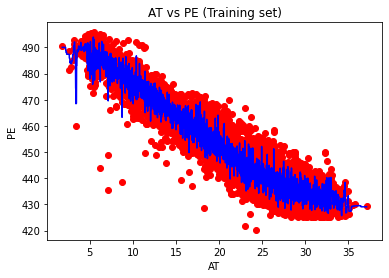

In [80]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, rf_regressor.predict(X_grid), color = 'blue')
plt.title('AT vs PE (Training set)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

**R-squared**

In [81]:
from sklearn.metrics import r2_score
r_squared_rf = r2_score(y_test, y_pred)
r_squared_rf

0.8862465543082302

# <font color='blue'><b> MODEL 2

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [85]:
y_pred = rf_regressor.predict(X_test)

In [86]:
print(y_pred)

[432.046 455.115 469.122 ... 466.675 443.109 459.776]


**visualisation**




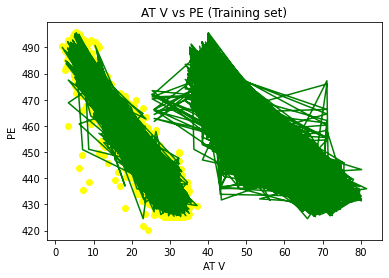

In [87]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'yellow')
plt.plot(X_train, rf_regressor.predict(X_train), color = 'green')
plt.title('AT V vs PE (Training set)')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

**R squared**

In [88]:
from sklearn.metrics import r2_score
r_squared_rf = r2_score(y_test, y_pred)
r_squared_rf

0.9531454697205233

# <font color='blue'><b> MODEL 3

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [213]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [214]:
y_pred = rf_regressor.predict(X_test)

In [215]:
print(y_pred)

[434.196 457.244 467.462 ... 470.379 438.512 462.336]


**visualisation**

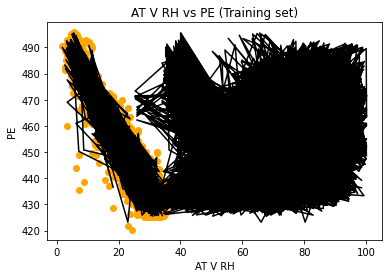

In [216]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'orange')
plt.plot(X_train, rf_regressor.predict(X_train), color = 'black')
plt.title('AT V RH vs PE (Training set)')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

**R squared**

In [217]:
from sklearn.metrics import r2_score
r_squared_rf = r2_score(y_test, y_pred)
r_squared_rf

0.9554376291546258

# <font color='blue'><b> MODEL 4

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [237]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [238]:
y_pred = rf_regressor.predict(X_test)

In [239]:
print(y_pred)

[434.049 458.785 463.02  ... 469.479 439.566 460.385]


**visualisation**

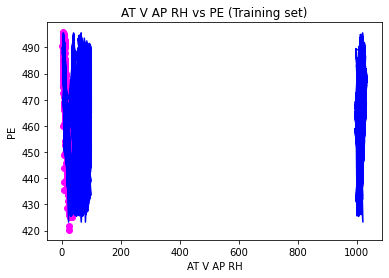

In [241]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'magenta')
plt.plot(X_train, rf_regressor.predict(X_train), color = 'blue')
plt.title('AT V AP RH vs PE (Training set)')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**R squared**

In [242]:
from sklearn.metrics import r2_score
r_squared_rf = r2_score(y_test, y_pred)
r_squared_rf

0.9615908334363876

## <font color='red'>**5. POLYNOMIAL REGRESSION**

# <font color='blue'><b> MODEL 1

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [149]:
y_poly_pred = pol_reg.predict(X_poly)

In [150]:
print(y_poly_pred)

[474.02870608 467.85893253 432.28471374 ... 459.70752932 470.08781919
 432.48609027]


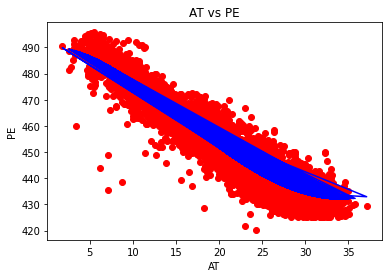

In [136]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, pol_reg.predict(X_poly), color = 'blue')
plt.title('AT vs PE')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

<b>R-squared

In [152]:
r2 = r2_score(y_train,y_poly_pred)

In [153]:
print(r2)

0.9107013168746315


# <font color='blue'><b> MODEL 2

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

In [155]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [156]:
y_poly_pred = pol_reg.predict(X_poly)

In [157]:
print(y_poly_pred)

[473.42177419 464.7419406  431.17912342 ... 462.52207672 470.24595088
 433.15375331]


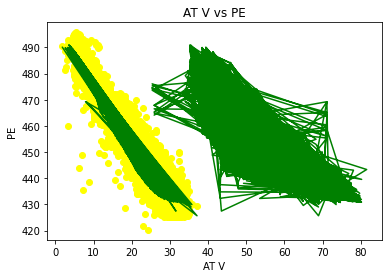

In [158]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'yellow')
plt.plot(X_train, pol_reg.predict(X_poly), color = 'green')
plt.title('AT V vs PE')
plt.xlabel('AT V')
plt.ylabel('PE')
plt.show()

<b>R-squared

In [159]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_train,y_poly_pred)
r_squared

0.9285922307329926

# <font color='blue'><b> MODEL 3

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [174]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [175]:
y_poly_pred = pol_reg.predict(X_poly)

In [176]:
print(y_poly_pred)

[474.16409853 466.248253   432.72002339 ... 462.31428268 470.08651869
 433.00200278]


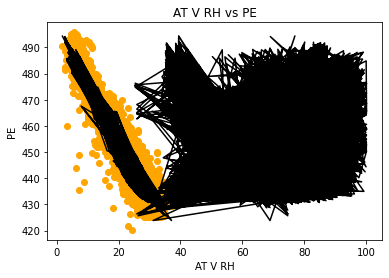

In [177]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'orange')
plt.plot(X_train, pol_reg.predict(X_poly), color = 'black')
plt.title('AT V RH vs PE')
plt.xlabel('AT V RH')
plt.ylabel('PE')
plt.show()

<b>R-squared

In [178]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_train,y_poly_pred)
r_squared

0.9371394475183914

# <font color='blue'><b> MODEL 4

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [193]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [194]:
y_poly_pred = pol_reg.predict(X_poly)

In [195]:
print(y_poly_pred)

[474.59664628 466.45613975 430.96663211 ... 461.76245193 469.23026588
 431.8611377 ]


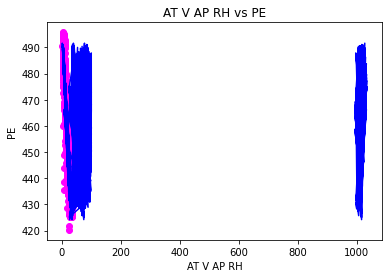

In [196]:
plt.scatter(X_train[X_train.columns[0]], y_train, color = 'magenta')
plt.plot(X_train, pol_reg.predict(X_poly), color = 'blue')
plt.title('AT V AP RH vs PE')
plt.xlabel('AT V AP RH')
plt.ylabel('PE')
plt.show()

**R squared**

In [197]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_train,y_poly_pred)
r_squared

0.9418288595453006

# **Performance Evaluation**

In [243]:
import matplotlib.pyplot as plt

In [244]:
import cv2

In [245]:
image = cv2.imread('/content/sss.png')

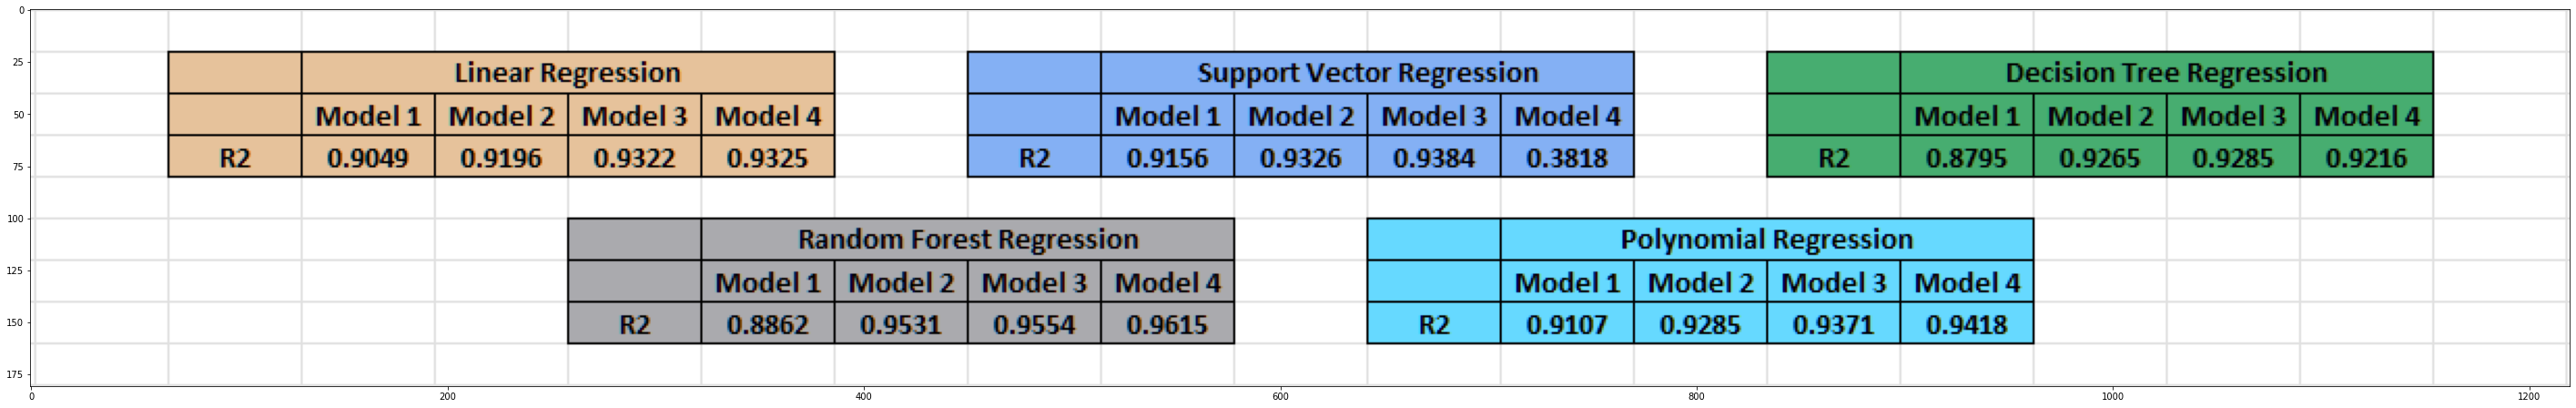

In [249]:
plt.figure(figsize=(50,50))
plt.imshow(image)
plt.show()

# **CONCLUSION**

We can conclude that from our results that <b>Model 4 with Random Forest Regression</b> should be selected, because it gives us the highest accuracy of <b>96.15%</b>